In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# read the 10-k financial data
df = pd.read_csv('Data Extraction and Initial Analysis .csv')

In [6]:
# check the dimensions of dataset
df.shape

(9, 9)

In [7]:
# let's look at the records
df.head(10)

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses (R & D),"Operating Expenses (Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions)
0,Microsoft,2024,245122,83136,512163,243686,29510,32065,62575
1,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529
2,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237
3,Tesla,2024,127047,17592,135423,51996,5276,6470,11746
4,Tesla,2023,96773,14974,106618,43009,3969,4800,8769
5,Tesla,2022,81462,12587,82338,36440,3075,3946,7021
6,Apple,2024,391035,93736,364980,308030,31370,26097,57467
7,Apple,2023,383285,96995,352583,290437,29915,24932,54847
8,Apple,2022,394328,99803,352755,302083,26251,25094,51345


In [9]:
# check datatypes
df.dtypes

Company                                                         object
Year                                                             int64
Total Revenue (in millions)                                      int64
Net Income (in millions)                                         int64
Total Assets (in millions)                                       int64
Total Liabilities (in millions)                                  int64
Operating Expenses (R & D)                                       int64
Operating Expenses (Sales & Marketing, Other Administrative)     int64
Total Cash Flow from Operating Activities (in millions)          int64
dtype: object

In [10]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9.0,2023.000000,0.866025,2022.0,2022.0,2023.0,2024.0,2024.0
Total Revenue (in millions),9.0,236581.888889,126499.599245,81462.0,127047.0,211915.0,383285.0,394328.0
Net Income (in millions),9.0,62658.000000,36999.221316,12587.0,17592.0,72738.0,93736.0,99803.0
Total Assets (in millions),9.0,298186.222222,151391.783152,82338.0,135423.0,352755.0,364980.0,512163.0
Total Liabilities (in millions),9.0,186636.888889,113968.640543,36440.0,51996.0,205753.0,290437.0,308030.0
Operating Expenses (R & D),9.0,20119.222222,12192.939717,3075.0,5276.0,26251.0,29510.0,31370.0
"Operating Expenses (Sales & Marketing, Other Administrative)",9.0,20162.555556,11570.826852,3946.0,6470.0,25094.0,27725.0,32065.0
Total Cash Flow from Operating Activities (in millions),9.0,40392.888889,23666.347999,7021.0,11746.0,52237.0,57467.0,62575.0


In [11]:
# Calculate year-over-year changes for each financial metric
df = df.sort_values(by=['Company', 'Year'])
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue (in millions)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income (in millions)'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets (in millions)'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities (in millions)'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Total Cash Flow from Operating Activities (in millions)'].pct_change() * 100

In [13]:
df.head(10)

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses (R & D),"Operating Expenses (Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
8,Apple,2022,394328,99803,352755,302083,26251,25094,51345,NaN,NaN,NaN,NaN,NaN
7,Apple,2023,383285,96995,352583,290437,29915,24932,54847,-2.800461,-2.813543,-0.048759,-3.855232,6.820528
6,Apple,2024,391035,93736,364980,308030,31370,26097,57467,2.021994,-3.359967,3.516052,6.057424,4.776925
2,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529,6.882030,-0.518299,12.919636,3.759493,10.130750
0,Microsoft,2024,245122,83136,512163,243686,29510,32065,62575,15.669962,14.890618,24.318650,18.436183,8.771228
5,Tesla,2022,81462,12587,82338,36440,3075,3946,7021,NaN,NaN,NaN,NaN,NaN
4,Tesla,2023,96773,14974,106618,43009,3969,4800,8769,18.795267,18.964010,29.488207,18.026894,24.896738
3,Tesla,2024,127047,17592,135423,51996,5276,6470,11746,31.283519,17.483638,27.017014,20.895626,33.949139


In [18]:
df = df.reset_index(drop='index')

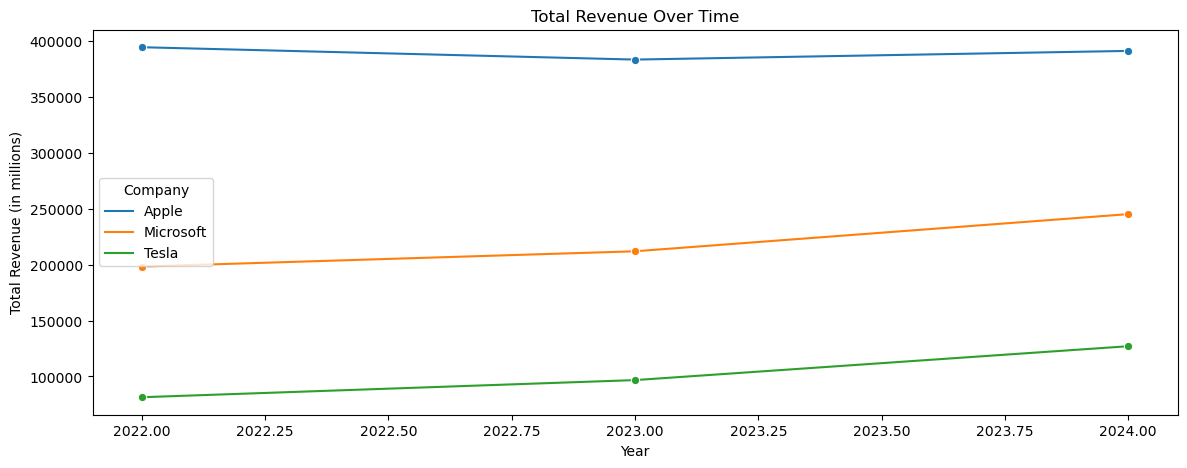

In [20]:
# Line chart for Total Revenue over time
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='Year', y='Total Revenue (in millions)', hue='Company', marker='o')
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

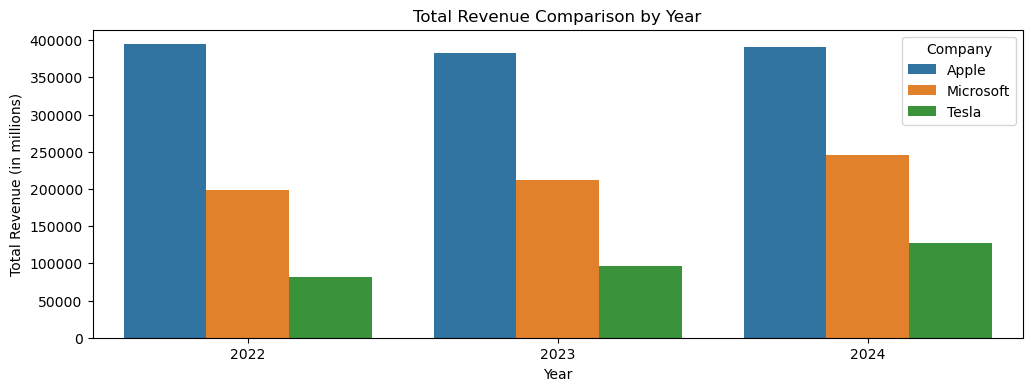

In [21]:
# Bar chart for Total Revenue comparison
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Year', y='Total Revenue (in millions)', hue='Company')
plt.title('Total Revenue Comparison by Year')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

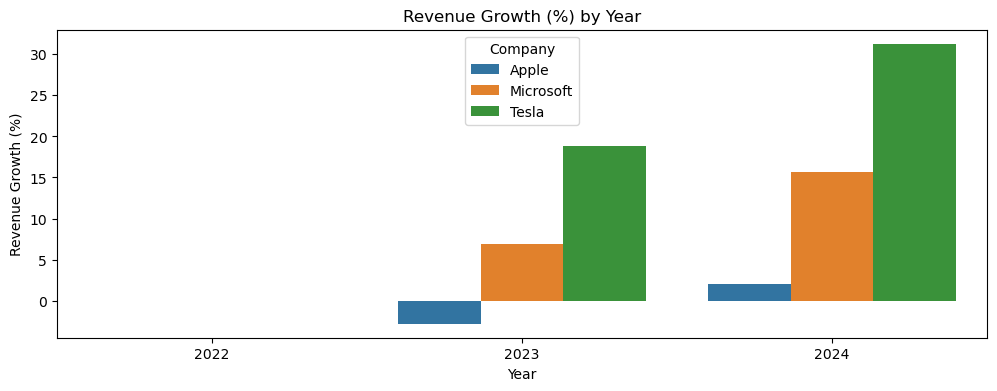

In [22]:
# Bar chart for Revenue Growth (%)
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Year', y='Revenue Growth (%)', hue='Company')
plt.title('Revenue Growth (%) by Year')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

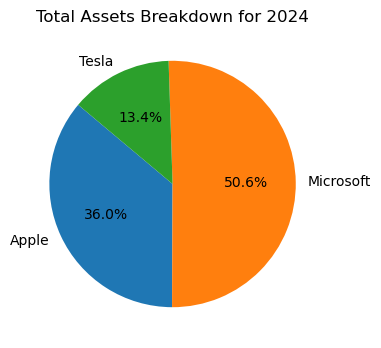

In [26]:
# Pie chart for the breakdown of Total Assets for the most recent year
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
latest_assets = latest_data.groupby('Company')['Total Assets (in millions)'].sum()

plt.figure(figsize=(6,4))
plt.pie(latest_assets, labels=latest_assets.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Total Assets Breakdown for {latest_year}')
plt.show()

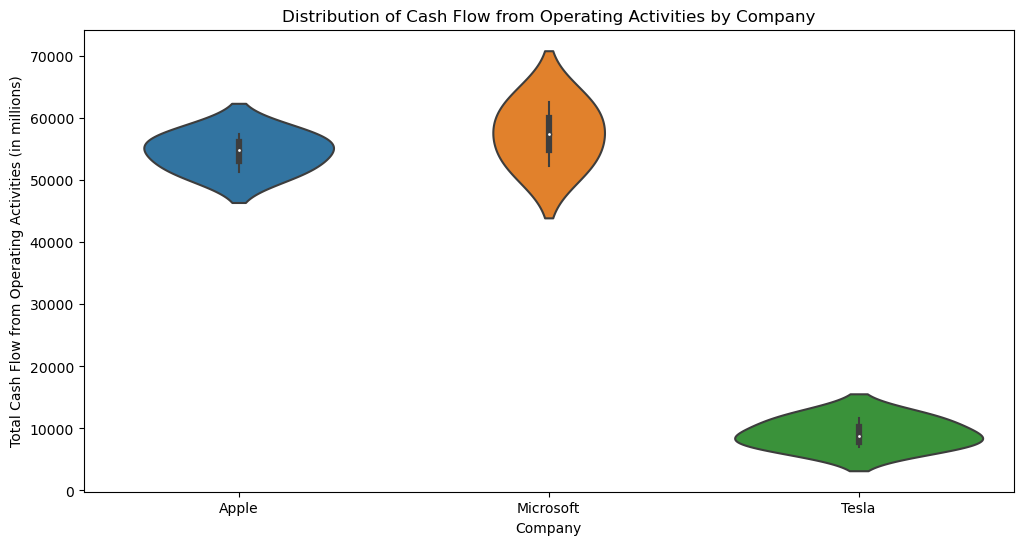

In [27]:
# Violin plot for Cash Flow from Operating Activities
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Company', y='Total Cash Flow from Operating Activities (in millions)')
plt.title('Distribution of Cash Flow from Operating Activities by Company')
plt.ylabel('Total Cash Flow from Operating Activities (in millions)')
plt.xlabel('Company')
plt.show()

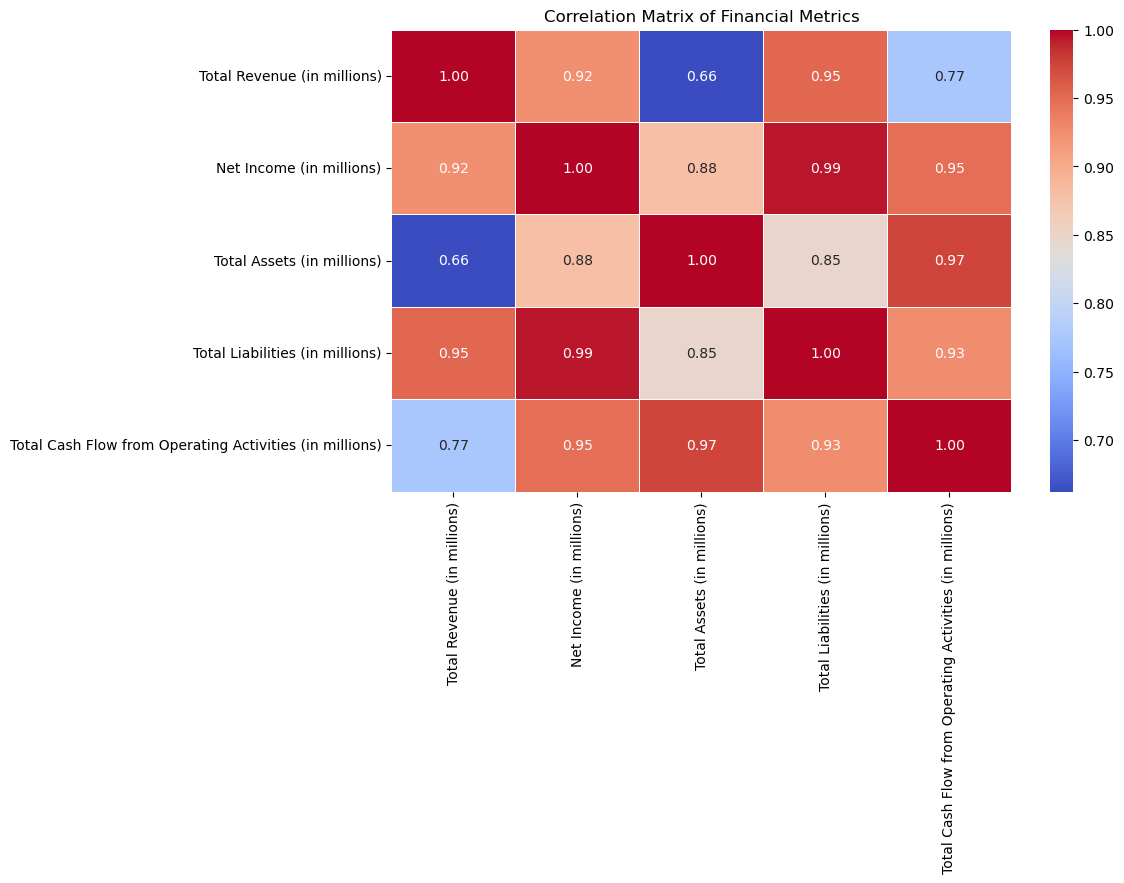

In [28]:
# Calculating the correlation matrix
correlation_matrix = df[['Total Revenue (in millions)', 'Net Income (in millions)', 
                         'Total Assets (in millions)', 'Total Liabilities (in millions)', 
                         'Total Cash Flow from Operating Activities (in millions)']].corr()

# Ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Financial Metrics')
plt.show()

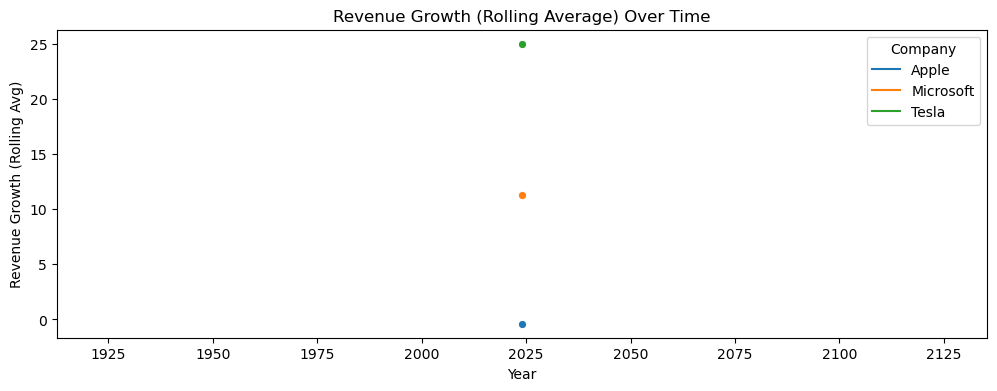

In [30]:
# Calculating rolling averages for Revenue Growth
df['Revenue Growth (Rolling Avg)'] = df.groupby('Company')['Revenue Growth (%)'].transform(lambda x: x.rolling(window=2).mean())

# Line chart with rolling averages
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='Year', y='Revenue Growth (Rolling Avg)', hue='Company', marker='o')
plt.title('Revenue Growth (Rolling Average) Over Time')
plt.ylabel('Revenue Growth (Rolling Avg)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

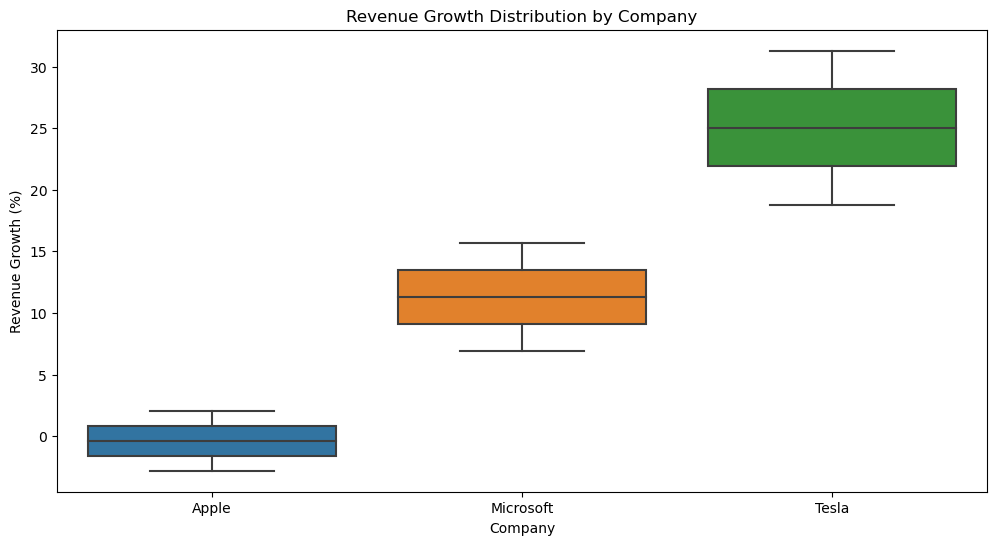

In [31]:
# Boxplot for Revenue Growth (%) by Company
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Company', y='Revenue Growth (%)')
plt.title('Revenue Growth Distribution by Company')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Company')
plt.show()

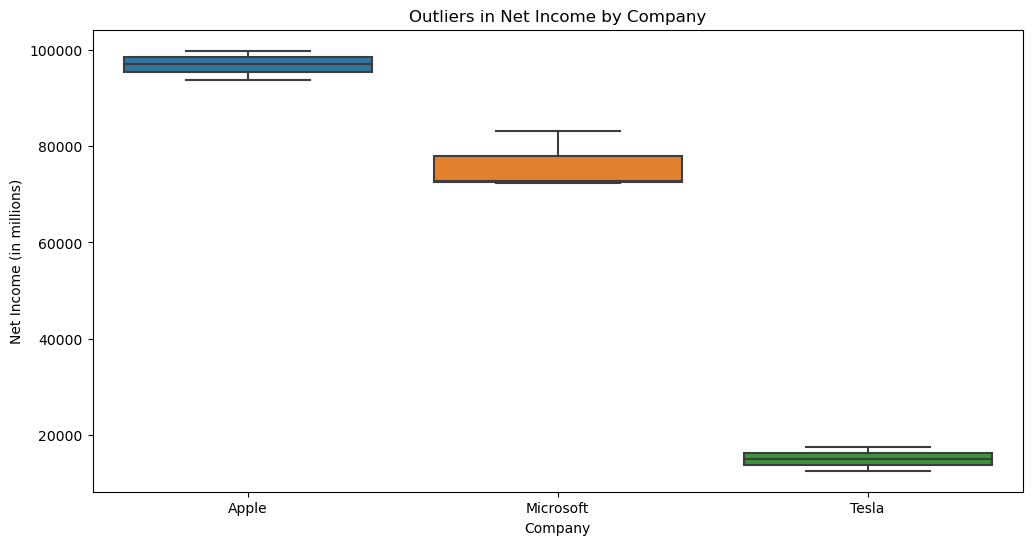

In [32]:
# Boxplot for detecting outliers in Net Income
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Company', y='Net Income (in millions)')
plt.title('Outliers in Net Income by Company')
plt.ylabel('Net Income (in millions)')
plt.xlabel('Company')
plt.show()

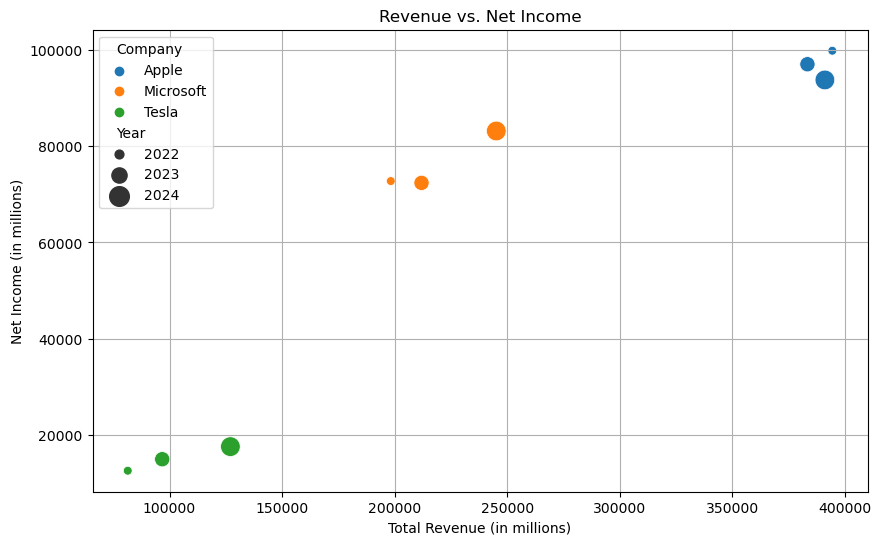

In [33]:
# Scatter plot for Revenue vs Net Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Revenue (in millions)', y='Net Income (in millions)', hue='Company', size='Year', sizes=(40, 200))
plt.title('Revenue vs. Net Income')
plt.xlabel('Total Revenue (in millions)')
plt.ylabel('Net Income (in millions)')
plt.grid(True)
plt.show()

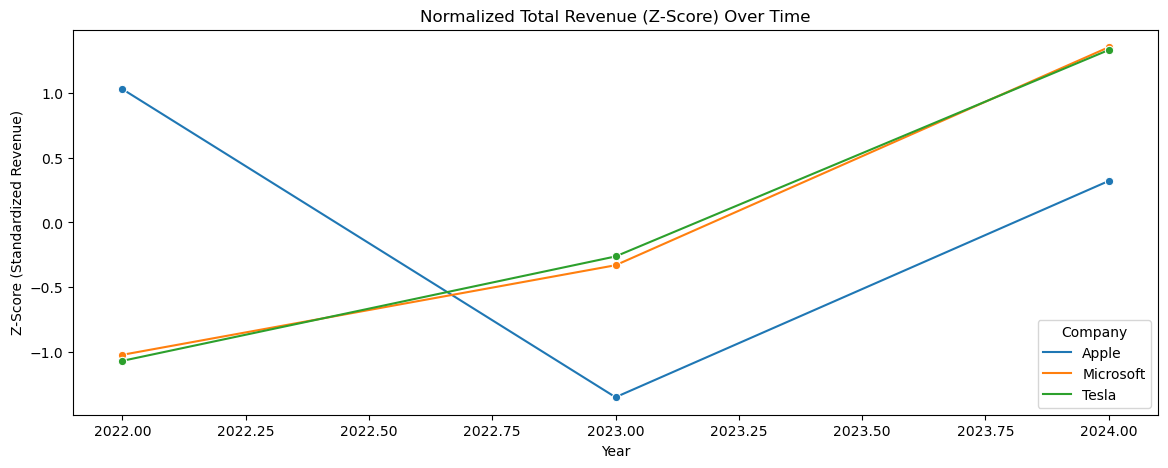

In [35]:
from scipy.stats import zscore

# Standardize financial metrics
metrics = ['Total Revenue (in millions)', 'Net Income (in millions)', 'Total Assets (in millions)', 
           'Total Liabilities (in millions)', 'Total Cash Flow from Operating Activities (in millions)']
df_zscore = df.copy()
for metric in metrics:
    df_zscore[metric + ' (Z-Score)'] = df_zscore.groupby('Company')[metric].transform(zscore)

# Line chart for Z-Score normalized revenue
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_zscore, x='Year', y='Total Revenue (in millions) (Z-Score)', hue='Company', marker='o')
plt.title('Normalized Total Revenue (Z-Score) Over Time')
plt.ylabel('Z-Score (Standardized Revenue)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

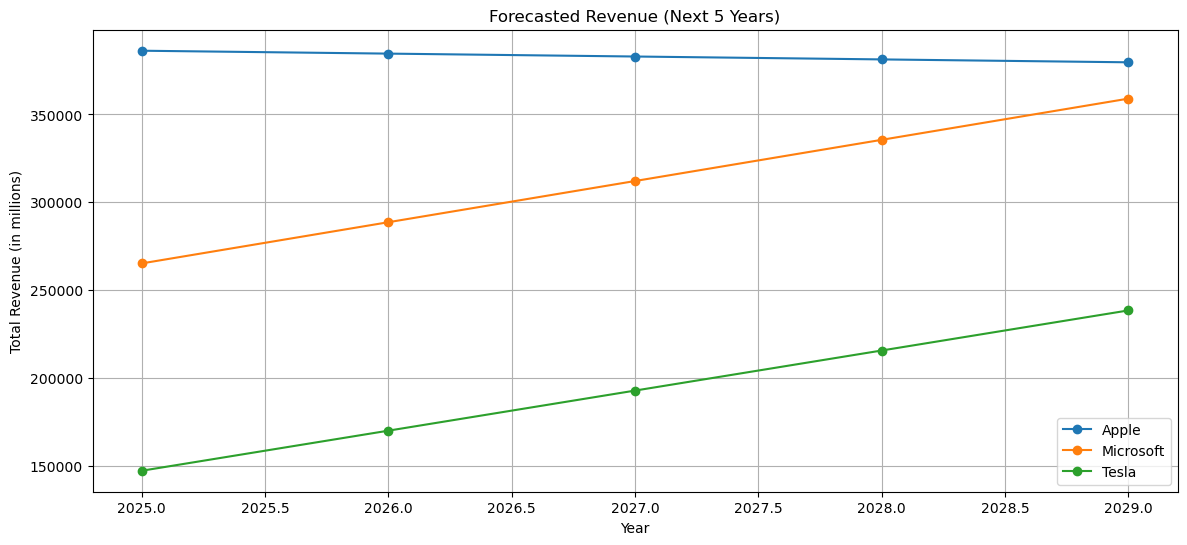

In [36]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
future_years = np.array(range(df['Year'].max() + 1, df['Year'].max() + 6)).reshape(-1, 1)
X = df['Year'].values.reshape(-1, 1)
forecast_data = {}

# Forecast revenue for each company
for company in df['Company'].unique():
    y = df[df['Company'] == company]['Total Revenue (in millions)']
    model = LinearRegression()
    model.fit(X[:len(y)], y)
    forecast_data[company] = model.predict(future_years)

# Create a DataFrame for forecast
forecast_df = pd.DataFrame(forecast_data, index=future_years.flatten()).reset_index()
forecast_df.columns = ['Year'] + list(forecast_data.keys())

# Plot forecasted revenue
plt.figure(figsize=(14, 6))
for company in df['Company'].unique():
    plt.plot(forecast_df['Year'], forecast_df[company], marker='o', label=company)
plt.title('Forecasted Revenue (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.legend()
plt.grid(True)
plt.show()

Summary and Findings
Based on the analyses conducted on the financial data of Apple, Microsoft, and Tesla for the years 2022–2024, here are the key insights:

Revenue Growth Trends:

Tesla exhibited the highest growth in total revenue, with consistent double-digit growth rates across the years.
Apple's revenue growth was relatively stable but faced slight declines in 2023, followed by a modest recovery in 2024.
Microsoft displayed consistent growth, with a significant jump in 2024.

Net Income Performance:

Despite revenue growth, Apple's net income decreased consistently over the years, suggesting increasing costs or operational inefficiencies.
Microsoft saw a remarkable recovery in net income in 2024, reflecting improved profitability.
Tesla's net income growth remained steady, indicating effective cost management alongside revenue growth.

Asset and Liability Analysis:

All companies displayed growth in assets over the years, with Microsoft achieving the largest relative increase in 2024.
Liability growth was also observed, but Tesla managed to maintain a lower rate of increase, reflecting better debt management.

Cash Flow Analysis:

Tesla demonstrated the highest increase in cash flow from operating activities, showcasing strong operational efficiency.
Apple's cash flow improved in 2024, despite declining net income, indicating effective cash management practices.
Microsoft's cash flow remained consistently high, aligning with its strong revenue growth.

Correlation Insights:

The correlation heatmap revealed strong relationships between total revenue and net income, indicating that higher revenue generally drives higher profitability.
Cash flow also showed a strong correlation with revenue, reinforcing the importance of operational efficiency.

Future Revenue Forecast:

Based on linear regression modeling, all three companies are expected to see growth in total revenue over the next five years.
Tesla is predicted to maintain the highest growth rate, while Microsoft is expected to see stable and consistent increases.

Conclusions and Recommendations

For Apple:

Address the declining trend in net income by optimizing operating expenses or exploring new revenue streams.
Leverage cash flow improvements to reinvest in innovative products or services to regain revenue momentum.

For Microsoft:

Continue focusing on scaling operations and maintaining profitability as evidenced by consistent growth in both revenue and net income.
Explore further opportunities in cloud computing or AI-driven products to sustain growth.

For Tesla:

Capitalize on strong revenue and cash flow growth to expand into new markets or invest in R&D for innovative products.
Monitor liabilities growth to maintain a healthy balance sheet.

General Recommendation for All Companies:

Companies should aim for balanced growth, ensuring revenue growth is accompanied by manageable costs, efficient cash flow management, and sustainable liability increases.